# NLTK Basics

*** Work to still do on this as of 5/17/2022: ****
- Do you always want to lowercase all words?
- Removing punctuation
- Improving efficiency of combining pandas Series of reviews into 1 array
- Sentiment analysis

### Loading in the Data

In [23]:
import pandas as pd
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joshs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [70]:
text = pd.read_csv('../../hotel-reviews.csv')

In [71]:
text.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [72]:
descriptions = text.loc[:,'Description']

## Practice using only 1 review

### Sentence Tokenization

In [73]:
from nltk.tokenize import sent_tokenize

In [74]:
print(descriptions[0])

The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing.


In [86]:
lowercase = descriptions[0].lower()
print(lowercase)

the room was kind of clean but had a very strong smell of dogs. generally below average but ok for a overnight stay if you're not too fussy. would consider staying again if the price was right. breakfast was free and just about better than nothing.


In [84]:
tokenized_text=sent_tokenize(lowercase)
print(tokenized_text)

['the room was kind of clean but had a very strong smell of dogs.', "generally below average but ok for a overnight stay if you're not too fussy.", 'would consider staying again if the price was right.', 'breakfast was free and just about better than nothing.']


### Word Tokenization

In [85]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(lowercase)
print(tokenized_word)

['the', 'room', 'was', 'kind', 'of', 'clean', 'but', 'had', 'a', 'very', 'strong', 'smell', 'of', 'dogs', '.', 'generally', 'below', 'average', 'but', 'ok', 'for', 'a', 'overnight', 'stay', 'if', 'you', "'re", 'not', 'too', 'fussy', '.', 'would', 'consider', 'staying', 'again', 'if', 'the', 'price', 'was', 'right', '.', 'breakfast', 'was', 'free', 'and', 'just', 'about', 'better', 'than', 'nothing', '.']


### Frequency Distribution

In [77]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 42 samples and 51 outcomes>


In [78]:
fdist.most_common(2)

[('.', 4), ('was', 3)]

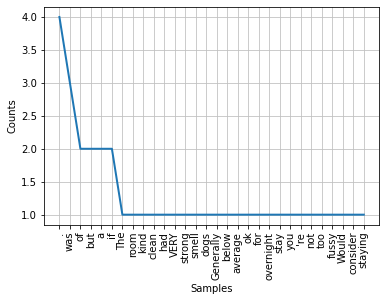

In [79]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Stopwords

In [80]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\joshs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [81]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'you', 'any', "hasn't", "haven't", 'our', 'ourselves', 'which', 'above', 'these', 'y', 'other', 'hasn', 'while', 'couldn', 'himself', 'them', 'few', 'herself', 'itself', 'or', 'is', "mustn't", 'its', 'own', "wouldn't", 'to', 'they', 'under', 'most', 'if', 'by', 'with', 'just', 'until', 'more', 'an', 'hadn', 'a', 'should', 't', "mightn't", 'so', 'very', 'than', 'had', 'too', 'such', "couldn't", 'from', "should've", 'mustn', 'being', "wasn't", "shan't", 'how', 'did', 'who', 'into', 'all', 'i', 'whom', "shouldn't", 'nor', 'where', 'again', 'his', 'then', "won't", 'over', 'weren', 'shan', 'at', 'yourselves', 'down', 'this', 'ain', 'him', 'd', 'ours', "don't", 'not', 'haven', 'further', 'my', "hadn't", 'in', 'will', 'up', 'that', 'ma', 'it', 'didn', 'after', 'yours', "that'll", 'no', "doesn't", 'yourself', 'doesn', 'the', 'll', 'needn', "it's", "needn't", 'there', "she's", 'each', 'same', 'those', 's', 'out', 'don', 'here', 'do', 'isn', 'once', "weren't", 'through', 'can', "didn't", 'doing

In [89]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
         filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['the', 'room', 'was', 'kind', 'of', 'clean', 'but', 'had', 'a', 'very', 'strong', 'smell', 'of', 'dogs', '.', 'generally', 'below', 'average', 'but', 'ok', 'for', 'a', 'overnight', 'stay', 'if', 'you', "'re", 'not', 'too', 'fussy', '.', 'would', 'consider', 'staying', 'again', 'if', 'the', 'price', 'was', 'right', '.', 'breakfast', 'was', 'free', 'and', 'just', 'about', 'better', 'than', 'nothing', '.']
Filterd Sentence: ['room', 'kind', 'clean', 'strong', 'smell', 'dogs', '.', 'generally', 'average', 'ok', 'overnight', 'stay', "'re", 'fussy', '.', 'would', 'consider', 'staying', 'price', 'right', '.', 'breakfast', 'free', 'better', 'nothing', '.']


### POS Tagging

In [91]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokenized_word)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\joshs\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('the', 'DT'),
 ('room', 'NN'),
 ('was', 'VBD'),
 ('kind', 'NN'),
 ('of', 'IN'),
 ('clean', 'JJ'),
 ('but', 'CC'),
 ('had', 'VBD'),
 ('a', 'DT'),
 ('very', 'RB'),
 ('strong', 'JJ'),
 ('smell', 'NN'),
 ('of', 'IN'),
 ('dogs', 'NNS'),
 ('.', '.'),
 ('generally', 'RB'),
 ('below', 'JJ'),
 ('average', 'NN'),
 ('but', 'CC'),
 ('ok', 'NN'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('overnight', 'JJ'),
 ('stay', 'NN'),
 ('if', 'IN'),
 ('you', 'PRP'),
 ("'re", 'VBP'),
 ('not', 'RB'),
 ('too', 'RB'),
 ('fussy', 'JJ'),
 ('.', '.'),
 ('would', 'MD'),
 ('consider', 'VB'),
 ('staying', 'VBG'),
 ('again', 'RB'),
 ('if', 'IN'),
 ('the', 'DT'),
 ('price', 'NN'),
 ('was', 'VBD'),
 ('right', 'JJ'),
 ('.', '.'),
 ('breakfast', 'NN'),
 ('was', 'VBD'),
 ('free', 'JJ'),
 ('and', 'CC'),
 ('just', 'RB'),
 ('about', 'IN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('nothing', 'NN'),
 ('.', '.')]

## Look at all reviews

In [124]:
# Lowercase all reviews for stopword removal
descriptions = descriptions.str.lower()

In [125]:
subset = descriptions.iloc[:5000]
subset

0       the room was kind of clean but had a very stro...
1       i stayed at the crown plaza april -- - april -...
2       i booked this hotel through hotwire at the low...
3       stayed here with husband and sons on the way t...
4       my girlfriends and i stayed here to celebrate ...
                              ...                        
4995    hilton nyc is a wonderful hotel where i stay w...
4996    i have stayed at the dunhill - or - times on b...
4997    we stayed at this hotel for a four day weekend...
4998    the hilton ft. worth proved to be a great choi...
4999    i booked this hotel as a mystery through book-...
Name: Description, Length: 5000, dtype: object

### Word tokenization

In [126]:
word_tokens = subset.apply(lambda x: word_tokenize(x))

### Remove stopwords

In [127]:
final_list = []
for i in word_tokens:
    final_list = final_list + i

In [129]:
filtered_final_list=[]
for w in final_list:
    if w not in stop_words:
         filtered_final_list.append(w)

### Fequency Distribution

In [131]:
fdist2 = FreqDist(filtered_final_list)
print(fdist2)

<FreqDist with 20928 samples and 585378 outcomes>


In [133]:
fdist2.most_common(5)

[("''", 68990), ('.', 45946), (',', 30189), ('hotel', 9334), ('room', 8098)]

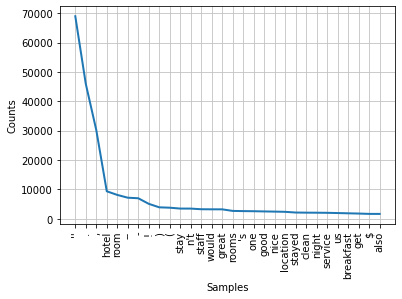

In [136]:
fdist2.plot(30,cumulative=False)
plt.show()